<a href="https://colab.research.google.com/github/iynnn/Semester-6/blob/main/AI/RNN%20Analisis%20Sentimen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisis Sentimen RNN
Muhamad Feriyanto / 3SD1/ 222011347 / Artificial Intellegence Pertemuan 11

In [3]:
# library yang akan digunakan untuk preprocessing tweet
# $ pip install tweet-preprocessor 
!pip install tweet-preprocessor -q

In [4]:
import pandas as pd
import preprocessor as p
import re
from google.colab import drive
drive.mount("/content/drive", force_remount = True)


Mounted at /content/drive


## Input Data Tweets from Google Drive

In [5]:
path = "/content/drive/MyDrive/[01] Kelass/3SD1/Smt 6 /AI/[11]/Tweets.csv"

df = pd.read_csv(path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [6]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [7]:
df.isna().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

## Preprocessing
Preprocessing menggunakan library tweet-preprocessor [Tweet Preprocessor](https://pypi.org/project/tweet-preprocessor/)

Preprocessing dilakukan pada coloumn "text". Preprocessing yang dilakukan adalah : 
* Hilangkan emoji 
* Hilangkan punctuation 
* Hilangkan URL 
* Lowercase

gatau apakah remove NA dan liat aja yang di bagian sentimentnya perlu dibersihkan apa tidak

## Cleaning
Using "clean", for remove the mention, links etc

In [8]:

df['text_clean'] = ''

# forming for a separature feature for cleaned tweets
for i,v in enumerate(df['text']): 
 df.loc[i, 'text_clean'] = p.clean(v) 

df[['text','text_clean']]

,text,text_clean
0,@VirginAmerica What @dhepburn said.,What said.
1,@VirginAmerica plus you've added commercials t...,plus you've added commercials to the experienc...
2,@VirginAmerica I didn't today... Must mean I n...,I didn't today... Must mean I need to take ano...
3,@VirginAmerica it's really aggressive to blast...,"it's really aggressive to blast obnoxious ""ent..."
4,@VirginAmerica and it's a really big bad thing...,and it's a really big bad thing about it
...,...,...
14635,@AmericanAir thank you we got on a different f...,thank you we got on a different flight to Chic...
14636,@AmericanAir leaving over 20 minutes Late Flig...,leaving over minutes Late Flight. No warnings ...
14637,@AmericanAir Please bring American Airlines to...,Please bring American Airlines to
14638,"@AmericanAir you have my money, you change my ...","you have my money, you change my flight, and d..."


## Lowercase

In [9]:
df['text_clean'] = df['text_clean'].apply(str.lower)
df[['text','text_clean']]

,text,text_clean
0,@VirginAmerica What @dhepburn said.,what said.
1,@VirginAmerica plus you've added commercials t...,plus you've added commercials to the experienc...
2,@VirginAmerica I didn't today... Must mean I n...,i didn't today... must mean i need to take ano...
3,@VirginAmerica it's really aggressive to blast...,"it's really aggressive to blast obnoxious ""ent..."
4,@VirginAmerica and it's a really big bad thing...,and it's a really big bad thing about it
...,...,...
14635,@AmericanAir thank you we got on a different f...,thank you we got on a different flight to chic...
14636,@AmericanAir leaving over 20 minutes Late Flig...,leaving over minutes late flight. no warnings ...
14637,@AmericanAir Please bring American Airlines to...,please bring american airlines to
14638,"@AmericanAir you have my money, you change my ...","you have my money, you change my flight, and d..."


## Remove Punctuation

In [10]:
df['text_clean'] = df['text_clean'].apply(lambda x : re.sub(r'[^\w\s]','',x))
df[['text','text_clean']]

,text,text_clean
0,@VirginAmerica What @dhepburn said.,what said
1,@VirginAmerica plus you've added commercials t...,plus youve added commercials to the experience...
2,@VirginAmerica I didn't today... Must mean I n...,i didnt today must mean i need to take another...
3,@VirginAmerica it's really aggressive to blast...,its really aggressive to blast obnoxious enter...
4,@VirginAmerica and it's a really big bad thing...,and its a really big bad thing about it
...,...,...
14635,@AmericanAir thank you we got on a different f...,thank you we got on a different flight to chicago
14636,@AmericanAir leaving over 20 minutes Late Flig...,leaving over minutes late flight no warnings o...
14637,@AmericanAir Please bring American Airlines to...,please bring american airlines to
14638,"@AmericanAir you have my money, you change my ...",you have my money you change my flight and don...


## Coloumn Selection 
Gunakan Kolom "text_clean" dan "airline_sentiment" sebagai input

In [11]:
tweets = df[["text_clean", "airline_sentiment"]]
tweets.head()

,text_clean,airline_sentiment
0,what said,neutral
1,plus youve added commercials to the experience...,positive
2,i didnt today must mean i need to take another...,neutral
3,its really aggressive to blast obnoxious enter...,negative
4,and its a really big bad thing about it,negative


In [12]:
tweets['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

In [13]:
tweets.isna().sum()

text_clean           0
airline_sentiment    0
dtype: int64

## Split Data
Split data set dengan rincian sebagai berikut 
* 80%  : Training Set 
* 10%  : Validation Set
* 10%  : Testing Set

Seed = 43

### Set Seed

In [14]:
import torch 
import torchvision
import torchvision.transforms as transforms
import numpy as np
import random
torch.manual_seed(43)

In [15]:
def seed_all(seed):
    if not seed:
        seed = 43

    print("[ Using Seed : ", seed, " ]")

    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.cuda.manual_seed(seed)
    np.random.seed(seed)
    random.seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

In [16]:
def seed_worker(worker_id):
    worker_seed = torch.initial_seed() % 2**32
    np.random.seed(worker_seed)
    random.seed(worker_seed)

In [17]:
seed = 43
seed_all(seed)
g = torch.Generator()
g.manual_seed(seed)

[ Using Seed :  43  ]


### Split Data

In [18]:
df_train, df_val, df_test = np.split(tweets.sample(frac = 1, random_state = seed),[int(0.8*len(tweets)), int(0.9*len(tweets))])


In [19]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11712 entries, 5747 to 10724
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   text_clean         11712 non-null  object
 1   airline_sentiment  11712 non-null  object
dtypes: object(2)
memory usage: 274.5+ KB


In [20]:
df_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1464 entries, 2676 to 9289
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   text_clean         1464 non-null   object
 1   airline_sentiment  1464 non-null   object
dtypes: object(2)
memory usage: 34.3+ KB


In [21]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1464 entries, 14343 to 14148
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   text_clean         1464 non-null   object
 1   airline_sentiment  1464 non-null   object
dtypes: object(2)
memory usage: 34.3+ KB


In [22]:
df_train.head()

,text_clean,airline_sentiment
5747,thanks for leaving me hanging here flights all...,negative
2220,instead of be told when we board we have to wa...,negative
11787,i want my money back now were sitting on the r...,negative
502,flying lax to sfo and after looking at the awe...,positive
11061,flight phxgtrd lead fa bill is the most profes...,positive


In [23]:
# df_train['airlane_sentiment'].value_counts()
# 

In [24]:
df_train['airline_sentiment'].value_counts()

negative    7359
neutral     2453
positive    1900
Name: airline_sentiment, dtype: int64

In [25]:
df_val.head()

,text_clean,airline_sentiment
2676,were sitting in ua1088 getting delayed becaus...,negative
863,i send an email about my bad experience and yo...,negative
8024,i have more flights that id love to redeem for...,neutral
9386,i find it funny that responds but you dont you...,negative
4147,jt the issue is with missed connections early ...,negative


In [26]:
df_test.head()

,text_clean,airline_sentiment
14343,no worries they called back hrs late flightr w...,negative
7075,our fleets on fleek,neutral
3747,its operated by united as its a heathrownewark...,neutral
6811,wowthx for thinking of us greg heard was amazi...,positive
8066,thanks for the 100 credit because of the hr de...,positive


## Vocabulary Class

In [27]:
class Vocabulary : 
  '''
  __init__ method is called by default as soon as an object of this class is initiated
  we use this method to initiate our vocab dictionaries
  '''

  def __init__(self, freq_threshold, max_size):
    '''
    freq_threshold : the minimum times a word must occur in corpus to be treated in vocab
    max_size : max source vocab size. Eg. if set to 10.000, we pick the top 10.000 most frequent words and discard object
    '''

    # initiate the index to token dict
    ## <PAD> --> padding, used for padding the shorter sentences in a batch to match the length of longest sentence in the batch 
    # dalam satu batch kalau matriks kan gaboleh panjangnya beda, nah dipaksa sama kan panjangnya, nah yang kurang atau osongnya itu diisi dengan PAD
    
    ## <UNK> --> words which are not found in the vocab are replace by this token
    self.itos = {0 : '<PAD>', 1 :'<UNK>'}
    
    #initiate the token to index dict
    self.stoi = {k:j for j,k in self.itos.items()}

    self.freq_threshold = freq_threshold
    self.max_size = max_size
  


  '''
  __len__ is used by dataloader later to create batches
  '''


  def __len__(self):
    return len(self.itos)


  '''
  a simple tokenizer to split on space and converts the sentence to list of words
  '''

  @staticmethod
  def tokenizer(text):
    return [tok.lower().strip() for tok in text.split(' ')]

  
  '''
  build the vocab : create a dictionary mapping of index to string (itos) and string to index (stoi)
  output ex. for stoi -> {'the' : 5, 'a' : 6, 'an' : 7}
  '''

  
  def build_vocabulary(self, sentence_list):
    # calculate the frequencies of each word first to remove the words with frew < threshold
    frequencies = {} #init the freq dict
    idx = 4 # index from which we want to our dict to start. We already used 4 indexs for pad, start, end, unk


    # calculate freq of words
    for sentence in sentence_list:
      for word in self.tokenizer(sentence):
        if word not in frequencies.keys():
          frequencies[word] = 1
        else:
          frequencies[word] +=1

    # limit vocab by removing low freq words
    frequencies = {k:v for k,v in frequencies.items() if v > self.freq_threshold}

    # limit vocab to the max size specified
    frequencies = dict(sorted(frequencies.items(), key = lambda x :-x[1]) [:self.max_size-idx]) # idx = 4 for pad, start, end, unk

    #create vocab
    for word in frequencies.keys():
      # print(word)
      self.stoi[word] = idx
      self.itos[idx] = word
      idx +=1
  

  '''
  convert the list of words to a list of corresponding indexes
  '''
  def numericalize(self, text):
    #tokenize text 
    tokenized_text = self.tokenizer(text)
    numericalized_text = []
    for token in tokenized_text:
      if token in self.stoi.keys():
        numericalized_text.append(self.stoi[token])
      else: # out-of-vocab words are represented by UNK token index
        numericalized_text.append(self.stoi['<UNK>'])

    return numericalized_text

## Class DataSet dan DataLoader

In [28]:
from torch.utils.data import Dataset, DataLoader
from torch.nn.utils.rnn import pad_sequence

In [29]:
class TweetSentimentDataset(Dataset):
  # Static constant variable
  LABEL2INDEX = {'positive' : 0, 'neutral' : 1, 'negative' : 2}
  INDEX2LABEL = {0 : 'positive', 1 :'neutral', 2 : 'negative' }
  NUM_LABELS = 3

  def load_dataset(self, df):
    df.columns = ['text_clean', 'airlane_sentiment']
    df['airline_sentiment'] = df['airlane_sentiment'].apply(lambda lab: self.LABEL2INDEX[lab])
    # print (df['airline_sentiment'])
    return df


  
  def __init__(self, df, freq_threshold = 3, vocab_max_size = 10000, *args, **kwargs):
    self.data = self.load_dataset(df)
    self.source_texts = self.data['text_clean'].tolist()
    self.freq_threshold = freq_threshold
    self.vocab_max_size = vocab_max_size

    # ini memanggil class vocabulary
    self.vocab = Vocabulary(freq_threshold, vocab_max_size)
    self.vocab.build_vocabulary(self.source_texts) #menggunakan attribut (?, lupa namanya) tapi kayanya atribut

  def __getitem__(self, index):
    data = self.data.iloc[index, : ]
    text, sentiment = data['text_clean'], data['airline_sentiment']
    token_ids = self.vocab.numericalize(text)
    return torch.tensor(token_ids), torch.tensor(sentiment)

  def __len__(self):
    return len(self.data)

In [30]:
class MyCollate:
  # my loading ini gunanya untuk menambahkan padding pada data yang kurang atau kecil 
  def __init__(self, pad_idx):
    self.pad_idx = pad_idx
  
  def __call__(self, batch):
    input_tensors = []
    labels  = []
    lengths = []

    for x,y in batch:
      input_tensors.append(x)
      labels.append(y)
      # print(x)
      lengths.append(x.shape[0]) # Assume shape is (T, *)
      # print(lengths)
    
    
    longest = max(lengths)

    if len(input_tensors[0].shape) == 1:
      x_padded = torch.nn.utils.rnn.pad_sequence(input_tensors, batch_first= True, padding_value = self.pad_idx)
    else : 
      raise Exception('Current implementation only support (T) shaped data')

    y_batched = torch.as_tensor(labels, dtype = torch.long)
    return x_padded, y_batched

## Tensor Data

In [31]:
# Create Tensor Dataset
train_data = TweetSentimentDataset(df_train)
val_data = TweetSentimentDataset(df_val)
test_data = TweetSentimentDataset(df_test)

In [32]:
# data loaders
batch_size = 5
# perkalian 5 matriksnya 


# make sure to SHUFFLE ypur data
pad_idx = 0
colate = MyCollate(pad_idx = pad_idx)

# Loader untuk meload datasetnya per batch  
train_loader = DataLoader(train_data, shuffle = True, batch_size = batch_size, collate_fn = colate, worker_init_fn = seed_worker, generator = g)
valid_loader = DataLoader(val_data, shuffle = True, batch_size = batch_size, collate_fn = colate, worker_init_fn = seed_worker, generator = g)
test_loader = DataLoader(test_data, shuffle = True, batch_size = batch_size, collate_fn = colate, worker_init_fn = seed_worker, generator = g)


## Change Into GPU

In [33]:
import torch
is_cuda = torch.cuda.is_available()

# If we have a GPU available, we'll set our device to GPU. We'll use this device variable later in our code

if is_cuda:
  device = torch.device("cuda")
  print("GPU is available")
else:
  device = torch.device("cpu")
  print("GPU not available, CPU used")

GPU is available


## Class Model RNN

In [34]:
import torch.nn as nn
import torch.nn.functional as F

class SentimentRNN(nn.Module):
  def __init__(self, no_layers, vocab_size, hidden_dim, embedding_dim,output_dim, drop_prob = 0.5):
    super(SentimentRNN, self).__init__()

    self.output_dim = output_dim
    self.hidden_dim = hidden_dim

    self.no_layers = no_layers
    self.vobcab_size = vocab_size 
    self.embedding = nn.Embedding(vocab_size, embedding_dim)
    # embedding dimention untuk setiap kata itu memiliki bobot (kaya tf idf gitu) yang panjangnya 64 isinya nanti akan belajar dari data itu 
    # suatu layer yang mempelajari weightnya untuk setiap kata 
    # untuk setiap vocabluary di kamus, masing-masing punya embeddingnya yang jumlahnya 64 kata itu 
    # istilahnya itu weight untuk masing-masing vobacubaly, 
    # nanti tinggal dicari di vocabnya, 
    
    self.rnn = nn.RNN(input_size = embedding_dim, hidden_size = self.hidden_dim, num_layers = no_layers, batch_first = True)
    self.dropout = nn.Dropout(0.3)
    self.fc = nn.Linear(self.hidden_dim, output_dim)
    self.softmax = nn.LogSoftmax(dim =1)

  def forward(self, x):
    batch_sixze = x.size(0)
    embeds = self.embedding(x)
    # ini ukuran dari embedsnya itu, jadi 5x10x64 
    rnn_out, hidden = self.rnn(embeds)
    # ini yang dimasukkan embedig
    # masalah output ukurannya nanti baca lagi yang ada di foto itu 
    out = self.dropout(hidden.squeeze(0))
    # dropout itu gunanya untuk mengambil hanya berapa persennya aja yang dianggap fitur paling penting

    out = self.fc(out) 
    # fc itu fullt connecting layer, 
    # masuknya 256, keluarnya jadi 3 node
    # untuk setiap data, nanti ada 3 nilai 
    output = self.softmax(out)

    return output


In [35]:
train_data[0]

(tensor([  35,    9,  421,   18, 1048,  144,   59,   65, 2248,   49,   38,   27,
           44]),
 tensor(2))

## Buat Model

In [36]:
no_layers = 1
vocab_size = len(train_data.vocab) + 2 # extra 2 for padding and unknown)
embedding_dim = 64
output_dim = 3
hidden_dim = 256


model = SentimentRNN(no_layers, vocab_size, hidden_dim, embedding_dim, output_dim, drop_prob = 0.5)


# moving to GPU
model.to(device)

SentimentRNN(
  (embedding): Embedding(2956, 64)
  (rnn): RNN(64, 256, batch_first=True)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc): Linear(in_features=256, out_features=3, bias=True)
  (softmax): LogSoftmax(dim=1)
)

## Training

In [37]:
import torch.optim as optim 
# criterion = nn.CrossEntropyLoss()
criterion = nn.NLLLoss()
# kan ini pake long soft max, jadinya make kriterianta nn.NLLLoss()
# ini udah biasa digunakan pada task tertentu
# optimizer = optim.SGD(model.parameters(), lr = 0.001, momentum = 0.9)
# ini juga make yang Adam 
lr = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr = lr)
# lr = 0.0001


# tadi kalau lebih dari 2 itu makenya softmax

In [38]:
import time
start_time = time.time()
epochs = 10 
val_accuracies = []

## Menghitung akurasi pada setiap Epoch

In [39]:
def compute_accuracy(model, data_loader, device):
  with torch.no_grad():
    correct_pred, num_examples = 0, 0
    for i, (features, targets) in enumerate(data_loader):
      features = features.to(device)
      targets = targets.to(device)

      logits = model(features)
      _, predicted_labels = torch.max(logits, 1)
      num_examples += targets.size(0)
      correct_pred += (predicted_labels == targets).sum()
  return correct_pred.float()/num_examples *100

with torch.set_grad_enabled(False):
  val_accuracies.append(compute_accuracy(model, valid_loader, device))
  print(f'val accuracy :' 
        f'{val_accuracies[-1]:.2f}%'
        )

val accuracy :25.48%


In [40]:
for layer in model.children():
   if hasattr(layer, 'reset_parameters'):
       layer.reset_parameters()

val_accuracies.clear()


In [41]:

temp_akurasi = 0.0
for epoch in range(epochs):
  running_loss = 0.0
  model.train()

  for i, data in enumerate(train_loader, 0):
    inputs, labels = data[0].to(device), data[1].to(device)
    # print(inputs)
    model.zero_grad()
    logits = model(inputs) # ini inputnya itu beda gitu loh
    loss = criterion(logits, labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    running_loss += loss.item()
    if i % 500 == 499: # prin every 500 mini batches
      print(f'[{epoch + 1}, {i + 1:5d}] loss : {running_loss / 500 :.3f}')
      running_loss = 0.0
  
  with torch.set_grad_enabled(False):
    val_accuracies.append(compute_accuracy(model, valid_loader, device))
    print(f'val_accuracy : ' 
          f'{val_accuracies[-1]:.2f}%')
  print(f'time elapsed : {(time.time()- start_time)/60:.2f} min')

  if (compute_accuracy(model, valid_loader, device) > temp_akurasi):
    model_terbaik = model

torch.save(model_terbaik.state_dict(), './model bagus.pth')

[1,   500] loss : 0.954
[1,  1000] loss : 0.992
[1,  1500] loss : 0.969
[1,  2000] loss : 0.974
val_accuracy : 56.01%
time elapsed : 0.17 min
[2,   500] loss : 0.928
[2,  1000] loss : 0.944
[2,  1500] loss : 0.963
[2,  2000] loss : 0.941
val_accuracy : 61.07%
time elapsed : 0.30 min
[3,   500] loss : 0.911
[3,  1000] loss : 0.956
[3,  1500] loss : 0.974
[3,  2000] loss : 0.939
val_accuracy : 61.48%
time elapsed : 0.45 min
[4,   500] loss : 0.961
[4,  1000] loss : 0.955
[4,  1500] loss : 0.955
[4,  2000] loss : 0.933
val_accuracy : 61.20%
time elapsed : 0.59 min
[5,   500] loss : 0.930
[5,  1000] loss : 0.942
[5,  1500] loss : 0.945
[5,  2000] loss : 0.939
val_accuracy : 61.34%
time elapsed : 0.73 min
[6,   500] loss : 0.933
[6,  1000] loss : 0.938
[6,  1500] loss : 0.952
[6,  2000] loss : 0.929
val_accuracy : 60.04%
time elapsed : 0.87 min
[7,   500] loss : 0.953
[7,  1000] loss : 0.933
[7,  1500] loss : 0.935
[7,  2000] loss : 0.924
val_accuracy : 60.79%
time elapsed : 1.01 min
[8,   

In [42]:
val_accuracies

[tensor(56.0109, device='cuda:0'),
 tensor(61.0656, device='cuda:0'),
 tensor(61.4754, device='cuda:0'),
 tensor(61.2022, device='cuda:0'),
 tensor(61.3388, device='cuda:0'),
 tensor(60.0410, device='cuda:0'),
 tensor(60.7924, device='cuda:0'),
 tensor(55.3279, device='cuda:0'),
 tensor(58.4016, device='cuda:0'),
 tensor(58.7432, device='cuda:0')]

In [43]:
akurasii = [gpu_tensor.to('cpu') for gpu_tensor in val_accuracies]
akurasii[1:]

[tensor(61.0656),
 tensor(61.4754),
 tensor(61.2022),
 tensor(61.3388),
 tensor(60.0410),
 tensor(60.7924),
 tensor(55.3279),
 tensor(58.4016),
 tensor(58.7432)]

Text(0.5, 0, 'Epoch')

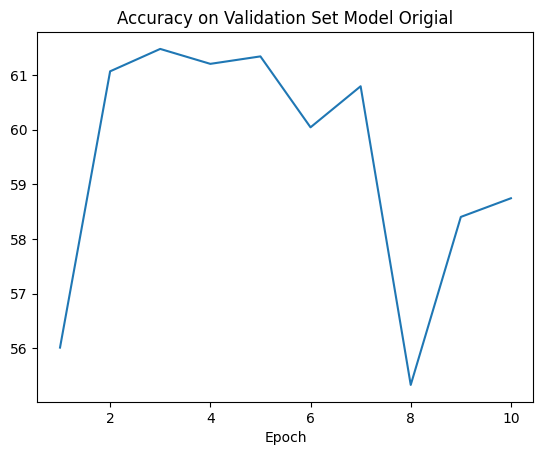

In [45]:
import matplotlib.pyplot as plt
x = range(1,len(akurasii)+1)
plt.plot(x, akurasii)
plt.title("Accuracy on Validation Set Model Origial")
plt.xlabel("Epoch")

In [46]:
model_baik = model
model_baik.load_state_dict(torch.load('./model bagus.pth'))

<All keys matched successfully>

In [47]:
akurasi_test = compute_accuracy(model_baik, test_loader, device).item()
print("Akurasi pada data testing adalah  : ", round(akurasi_test,2), "%")

Akurasi pada data testing adalah  :  59.15 %
